In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score
from sklearn.utils import shuffle
import time

In [2]:
benign1=pd.read_csv("medbiot/bashlite_leg_fan.csv")
benign2=pd.read_csv("medbiot/bashlite_leg_light.csv")
benign3=pd.read_csv("medbiot/bashlite_leg_lock.csv")
benign4=pd.read_csv("medbiot/bashlite_leg_switch.csv")
benign5=pd.read_csv("medbiot/torii_leg_light.csv")
benign6=pd.read_csv("medbiot/torii_leg_fan.csv")
benign7=pd.read_csv("medbiot/torii_leg_lock.csv")
benign8=pd.read_csv("medbiot/torii_leg_raspberry1.csv")
benign9=pd.read_csv("medbiot/torii_leg_raspberry2.csv")
benign10=pd.read_csv("medbiot/torii_leg_switch.csv")
benign11=pd.read_csv("medbiot/mirai_leg_fan.csv")
benign12=pd.read_csv("medbiot/mirai_leg_light.csv")
benign13=pd.read_csv("medbiot/mirai_leg_lock.csv")
benign14=pd.read_csv("medbiot/mirai_leg_switch.csv")
mirai1=pd.read_csv("medbiot/mirai_mal_CC_fan.csv")
mirai2=pd.read_csv("medbiot/mirai_mal_CC_light.csv")
mirai3=pd.read_csv("medbiot/mirai_mal_CC_lock.csv")
mirai4=pd.read_csv("medbiot/mirai_mal_CC_switch.csv")
mirai5=pd.read_csv("medbiot/mirai_mal_spread_fan.csv")
mirai6=pd.read_csv("medbiot/mirai_mal_spread_light.csv")
mirai7=pd.read_csv("medbiot/mirai_mal_spread_lock.csv")
mirai8=pd.read_csv("medbiot/mirai_mal_spread_switch.csv")
bahslite1=pd.read_csv("medbiot/bashlite_mal_CC_fan.csv")
bahslite2=pd.read_csv("medbiot/bashlite_mal_CC_light.csv")
bahslite3=pd.read_csv("medbiot/bashlite_mal_CC_lock.csv")
bahslite4=pd.read_csv("medbiot/bashlite_mal_CC_switch.csv")
bahslite5=pd.read_csv("medbiot/bashlite_mal_spread_fan.csv")
bahslite6=pd.read_csv("medbiot/bashlite_mal_spread_light.csv")
bahslite7=pd.read_csv("medbiot/bashlite_mal_spread_lock.csv")
bahslite8=pd.read_csv("medbiot/bashlite_mal_spread_switch.csv")
tori1=pd.read_csv("medbiot/torii_mal_fan.csv")
tori2=pd.read_csv("medbiot/torii_mal_light.csv")
tori3=pd.read_csv("medbiot/torii_mal_lock.csv")
tori4=pd.read_csv("medbiot/torii_mal_raspberry1.csv")
tori5=pd.read_csv("medbiot/torii_mal_raspberry2.csv")
tori6=pd.read_csv("medbiot/torii_mal_switch.csv")

In [3]:
benign1['Out']='Benign'
benign2['Out']='Benign'
benign3['Out']='Benign'
benign4['Out']='Benign'
benign5['Out']='Benign'
benign6['Out']='Benign'
benign7['Out']='Benign'
benign8['Out']='Benign'
benign9['Out']='Benign'
benign10['Out']='Benign'
benign11['Out']='Benign'
benign12['Out']='Benign'
benign13['Out']='Benign'
benign14['Out']='Benign'
mirai1['Out']='Mirai'
mirai2['Out']='Mirai'
mirai3['Out']='Mirai'
mirai4['Out']='Mirai'
mirai5['Out']='Mirai'
mirai6['Out']='Mirai'
mirai7['Out']='Mirai'
mirai8['Out']='Mirai'
bahslite1['Out']='Bashlite'
bahslite2['Out']='Bashlite'
bahslite3['Out']='Bashlite'
bahslite4['Out']='Bashlite'
bahslite5['Out']='Bashlite'
bahslite6['Out']='Bashlite'
bahslite7['Out']='Bashlite'
bahslite8['Out']='Bashlite'
tori1['Out']='Torii'
tori2['Out']='Torii'
tori3['Out']='Torii'
tori4['Out']='Torii'
tori5['Out']='Torii'
tori6['Out']='Torii'

In [5]:
df=pd.concat([benign1,benign2,benign3,benign4,benign5,benign6,benign7,benign8,benign9,benign10,benign11,benign12,benign13,benign14,
              mirai1,mirai2,mirai3,mirai4,mirai5,mirai6,mirai7,mirai8,bahslite1,bahslite2,bahslite3,bahslite4,bahslite5,bahslite6,bahslite7,bahslite8,
             tori1,tori2,tori3,tori4,tori5,tori6],axis=0)
df=shuffle(df)
y=df['Out']
df=df.drop(['Out'],axis=1)
X=df.iloc[:,:115]
start = time.time()

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [7]:
# Applying T-SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3)
X = svd.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1494055, 3) (640310, 3) (1494055,) (640310,)


In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from evolutionary_search import EvolutionaryAlgorithmSearchCV

parameters = {'learning_rate': [0.1],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [30],
                  'max_depth'    : [20] 
                 }

Bayes = EvolutionaryAlgorithmSearchCV(GradientBoostingClassifier(), parameters, verbose=1, cv=3)
print (Bayes.fit(x_train,y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Types [2, 2, 1, 1] and maxint [0, 2, 0, 0] detected
--- Evolve in 3 possible combinations ---
gen	nevals	avg    	min     	max     	std        
0  	50    	0.98847	0.987514	0.989025	0.000717044
1  	33    	0.988957	0.987514	0.989025	0.000295071
2  	27    	0.989024	0.988984	0.989025	8.00072e-06
3  	26    	0.989025	0.989025	0.989025	0          
4  	29    	0.989024	0.988984	0.989025	5.71599e-06
5  	43    	0.988964	0.987514	0.989025	0.000296046
6  	37    	0.988934	0.987514	0.989025	0.000358919
7  	25    	0.989025	0.989025	0.989025	0          
8  	35    	0.988995	0.987514	0.989025	0.000211585
9  	34    	0.988934	0.987514	0.989025	0.000358919
10 	20    	0.989025	0.989025	0.989025	0          
Best individual is: {'learning_rate': 0.1, 'subsample': 0.9, 'n_estimators': 30, 'max_depth': 20}
with fitness: 0.9890251697561335
None


In [10]:
ygb= Bayes.predict(x_train)
end = time.time()
print(end - start, "seconds")
print('Accuracy Score:')
print(accuracy_score(y_train,ygb))

29530.85161113739 seconds
Accuracy Score:
0.9998467258568124


In [11]:
clr= confusion_matrix(y_train,ygb)
clr

array([[547137,     18,     13,      0],
       [     3, 761506,      3,      0],
       [   128,     53, 139891,      0],
       [     4,      0,      7,  45292]], dtype=int64)

Confusion matrix, without normalization
[[547137     18     13      0]
 [     3 761506      3      0]
 [   128     53 139891      0]
 [     4      0      7  45292]]
Normalized confusion matrix
[[9.99943345e-01 3.28966606e-05 2.37586993e-05 0.00000000e+00]
 [3.93953083e-06 9.99992121e-01 3.93953083e-06 0.00000000e+00]
 [9.13815752e-04 3.78376835e-04 9.98707807e-01 0.00000000e+00]
 [8.82943734e-05 0.00000000e+00 1.54515154e-04 9.99757190e-01]]


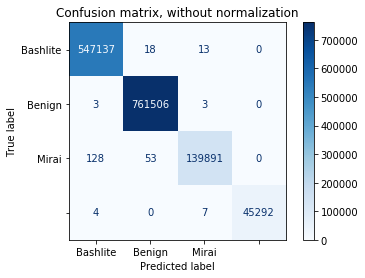

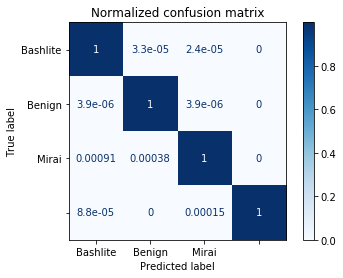

In [12]:
from sklearn.metrics import plot_confusion_matrix

classes=["Bashlite", "Benign", "Mirai"]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(Bayes, x_train, y_train,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [13]:
clrr = clr.astype('float') / clr.sum(axis=1)[:, np.newaxis]
clrr.diagonal()

array([0.99994334, 0.99999212, 0.99870781, 0.99975719])

In [14]:
acc_score= accuracy_score(y_train,ygb)
acc_score

0.9998467258568124

In [15]:
Pr = precision_score(y_train, ygb,  average="macro")
tpr = recall_score(y_train, ygb,  average="macro")   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value

print("precision_score:", Pr)
print("recall:", tpr)

precision_score: 0.9998739269078226
recall: 0.9996001158661871


In [16]:
cm=confusion_matrix(y_train.ravel(), ygb.ravel())
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

rec = tp / (tp + fn)
spe = tn / (tn + fp)
fal = fp / (fp + tn)
mis = fn / (fn + tp)


print("Calculating recall (also called the true positive rate or the sensitivity) for each class: ",rec)
print("Calculating specificity (also called the true negative rate) for each class: ",spe)
print("Calculating fall out (also called the false positive rate) for each class: ",fal)
print("Calculating miss rate (also called the false negative rate) for each class: ",mis)

Calculating recall (also called the true positive rate or the sensitivity) for each class:  0.9999960604536519
Calculating specificity (also called the true negative rate) for each class:  0.9999671025577761
Calculating fall out (also called the false positive rate) for each class:  3.28974422238671e-05
Calculating miss rate (also called the false negative rate) for each class:  3.939546348106194e-06


In [17]:
print(classification_report(y_train, ygb))

              precision    recall  f1-score   support

    Bashlite       1.00      1.00      1.00    547168
      Benign       1.00      1.00      1.00    761512
       Mirai       1.00      1.00      1.00    140072
       Torii       1.00      1.00      1.00     45303

    accuracy                           1.00   1494055
   macro avg       1.00      1.00      1.00   1494055
weighted avg       1.00      1.00      1.00   1494055

